# YOLOv2

## Prepare Data
### Preparing Pascal VOC 2007
To Prepare the data first go to Examples/Images/DataSets/Pascal and install the data with the install_data.py scripts. 
Then go to Examples/Images/DataSets/Pascal/mappings and run create_mappings.py to preprocess the ground truth boxes.

## Train the model

In [1]:
import os, sys
import Distributed_YOLOv2 as dy
import PARAMETERS as par
import YOLOv2 as yolo2
from ErrorFunction import get_error
from cntk import input_variable, Communicator


In [2]:
model = yolo2.create_yolov2_net(par)
image_input = input_variable((par.par_num_channels, par.par_image_height, par.par_image_width), name="data")
output = model(image_input)  # append model to image input

# input for ground truth boxes
num_gtb = par.par_max_gtbs
gtb_input = input_variable((num_gtb * 5))  # 5 for class, x,y,w,h

if not par.par_boxes_centered:
    original_shape = gtb_input.shape
    new_shape = (num_gtb, 5)
    reshaped = reshape(gtb_input, new_shape)
    xy = reshaped[:,0:2]
    wh = reshaped[:,2:4]
    cls = reshaped[:,4:]
    center_xy = xy + wh*.5
    new_gtb = splice(xy,wh,cls,axis=1)
    gtb_transformed = reshape(new_gtb, gtb_input.shape)
else:
    gtb_transformed = gtb_input

mse = get_error(output, gtb_transformed, cntk_only=False)# + zero

network = {
    'feature': image_input,
    'gtb_in': gtb_input,
    'mse': mse,
    'output': output
}



#from cntk.logging.graph import plot
#plot(output, "./yopar.png")
#plot(network['mse'], "./yolo_mse.png")



In [3]:
data_path = os.path.join(par.par_abs_path, "..", "..", "DataSets","Pascal", "mappings")

train_image_file = os.path.join(data_path, par.par_train_data_file)
train_gt_file = os.path.join(data_path, par.par_train_roi_file)

test_image_file =None # os.path.join(data_path, par.par_test_data_file)
test_gt_file =None # os.path.join(data_path, par.par_test_roi_file)

log_dir = None

In [4]:
base_lr = 1e-3
#par.par_lr_schedule = [base_lr * 0.1]*10 + [base_lr * 1]*30
par.par_lr_schedule = [base_lr]*45 + [base_lr * 0.1]*30 + [base_lr * 0.01]
par.par_max_epochs = 50
par.par_minibatch_size = 16

In [5]:
from cntk.cntk_py import force_deterministic_algorithms_deterministic_algorithms_deterministic_algorithms_deterministic_algorithms
force_deterministic_algorithms()

ImportError: cannot import name 'force_deterministic_algorithms_deterministic_algorithms_deterministic_algorithms_deterministic_algorithms'

In [6]:
#training!
try:
    output = dy.yolov2_train_and_eval(network, 
                                   train_image_file, train_gt_file,
                                   test_image_file, test_gt_file,
                                   max_epochs=par.par_max_epochs,
                                   log_to_file=log_dir,
                                   num_mbs_per_log=50,
                                   minibatch_size=par.par_minibatch_size,
                                   epoch_size=par.par_epoch_size,
                                   gen_heartbeat=False)

finally:
    Communicator.finalize()
    print("Training finished!")

 Minibatch[   1-  50]: loss = 35.146758 * 800, metric = 3514.68% * 800;
 Minibatch[  51- 100]: loss = 8.966123 * 800, metric = 896.61% * 800;
 Minibatch[ 101- 150]: loss = 8.828574 * 800, metric = 882.86% * 800;
 Minibatch[ 151- 200]: loss = 8.153745 * 800, metric = 815.37% * 800;
 Minibatch[ 201- 250]: loss = 8.254912 * 800, metric = 825.49% * 800;
 Minibatch[ 251- 300]: loss = 8.234375 * 800, metric = 823.44% * 800;
Finished Epoch[1 of 50]: [Training] loss = 12.716099 * 5024, metric = 1271.61% * 5024 210.464s ( 23.9 samples/s);
 Minibatch[   1-  50]: loss = 7.873705 * 800, metric = 787.37% * 800;
 Minibatch[  51- 100]: loss = 7.459012 * 800, metric = 745.90% * 800;
 Minibatch[ 101- 150]: loss = 7.797517 * 800, metric = 779.75% * 800;
 Minibatch[ 151- 200]: loss = 7.320779 * 800, metric = 732.08% * 800;
 Minibatch[ 201- 250]: loss = 7.501560 * 800, metric = 750.16% * 800;
 Minibatch[ 251- 300]: loss = 7.687954 * 800, metric = 768.80% * 800;
Finished Epoch[2 of 50]: [Training] loss = 7

 Minibatch[ 151- 200]: loss = 6.930964 * 800, metric = 693.10% * 800;
 Minibatch[ 201- 250]: loss = 7.535256 * 800, metric = 753.53% * 800;
 Minibatch[ 251- 300]: loss = 7.153081 * 800, metric = 715.31% * 800;
Finished Epoch[16 of 50]: [Training] loss = 7.125973 * 5008, metric = 712.60% * 5008 200.579s ( 25.0 samples/s);
 Minibatch[   1-  50]: loss = 7.448622 * 800, metric = 744.86% * 800;
 Minibatch[  51- 100]: loss = 7.017776 * 800, metric = 701.78% * 800;
 Minibatch[ 101- 150]: loss = 7.093051 * 800, metric = 709.31% * 800;
 Minibatch[ 151- 200]: loss = 6.941013 * 800, metric = 694.10% * 800;
 Minibatch[ 201- 250]: loss = 6.850505 * 800, metric = 685.05% * 800;
 Minibatch[ 251- 300]: loss = 6.558345 * 800, metric = 655.83% * 800;
Finished Epoch[17 of 50]: [Training] loss = 6.983759 * 5024, metric = 698.38% * 5024 201.262s ( 25.0 samples/s);
 Minibatch[   1-  50]: loss = 6.830879 * 800, metric = 683.09% * 800;
 Minibatch[  51- 100]: loss = 6.377471 * 800, metric = 637.75% * 800;
 Min

Finished Epoch[31 of 50]: [Training] loss = 7.509813 * 5008, metric = 750.98% * 5008 202.586s ( 24.7 samples/s);
 Minibatch[   1-  50]: loss = 7.906732 * 800, metric = 790.67% * 800;
 Minibatch[  51- 100]: loss = 7.450250 * 800, metric = 745.02% * 800;
 Minibatch[ 101- 150]: loss = 7.588436 * 800, metric = 758.84% * 800;
 Minibatch[ 151- 200]: loss = 7.345552 * 800, metric = 734.56% * 800;
 Minibatch[ 201- 250]: loss = 7.353188 * 800, metric = 735.32% * 800;
 Minibatch[ 251- 300]: loss = 7.779094 * 800, metric = 777.91% * 800;
Finished Epoch[32 of 50]: [Training] loss = 7.589033 * 5008, metric = 758.90% * 5008 208.251s ( 24.0 samples/s);
 Minibatch[   1-  50]: loss = 7.967037 * 800, metric = 796.70% * 800;
 Minibatch[  51- 100]: loss = 7.756846 * 800, metric = 775.68% * 800;
 Minibatch[ 101- 150]: loss = 7.282623 * 800, metric = 728.26% * 800;
 Minibatch[ 151- 200]: loss = 7.108076 * 800, metric = 710.81% * 800;
 Minibatch[ 201- 250]: loss = 7.799622 * 800, metric = 779.96% * 800;
 Min

 Minibatch[ 101- 150]: loss = 8.047406 * 800, metric = 804.74% * 800;
 Minibatch[ 151- 200]: loss = 7.525024 * 800, metric = 752.50% * 800;
 Minibatch[ 201- 250]: loss = 7.666335 * 800, metric = 766.63% * 800;
 Minibatch[ 251- 300]: loss = 7.316106 * 800, metric = 731.61% * 800;
Finished Epoch[47 of 50]: [Training] loss = 7.718468 * 5008, metric = 771.85% * 5008 216.731s ( 23.1 samples/s);
 Minibatch[   1-  50]: loss = 8.265466 * 800, metric = 826.55% * 800;
 Minibatch[  51- 100]: loss = 7.230635 * 800, metric = 723.06% * 800;
 Minibatch[ 101- 150]: loss = 7.905352 * 800, metric = 790.54% * 800;
 Minibatch[ 151- 200]: loss = 7.646926 * 800, metric = 764.69% * 800;
 Minibatch[ 201- 250]: loss = 7.600906 * 800, metric = 760.09% * 800;
 Minibatch[ 251- 300]: loss = 7.526750 * 800, metric = 752.68% * 800;
Finished Epoch[48 of 50]: [Training] loss = 7.715522 * 5008, metric = 771.55% * 5008 217.344s ( 23.0 samples/s);
 Minibatch[   1-  50]: loss = 7.979863 * 800, metric = 797.99% * 800;
 Min

In [7]:
output_dir = "."
if output is not None and output_dir is not None:
    save_path = os.path.join(output_dir, "YOLOv2-Res101.model")
    output.save(save_path)
    print("Saved model to " + save_path)
trained_model = output

Saved model to ./YOLOv2-Res101.model


In [ ]:
from cntk import load_model
trained_model = load_model(os.path.join(".", "YOLOv2-Res101.model"))

## Evaluate

Box out of bounds: (19,32) (389,291)


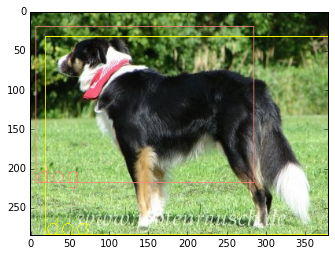

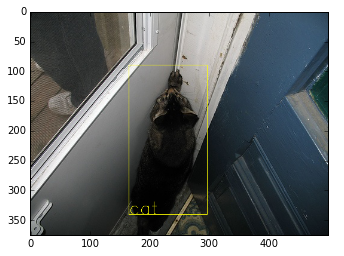

Box out of bounds: (116,37) (268,350)
Box out of bounds: (179,78) (513,296)
Box out of bounds: (18,-12) (135,395)
Box out of bounds: (158,132) (456,351)
Box out of bounds: (-93,80) (324,256)
Box out of bounds: (91,103) (216,337)


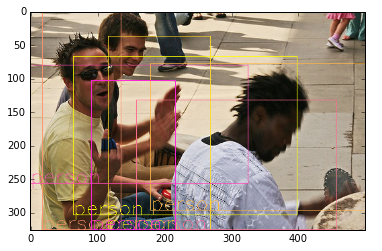

Box out of bounds: (212,-1) (311,432)


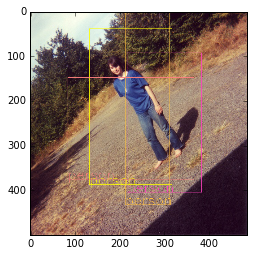

Box out of bounds: (-67,56) (529,332)
Box out of bounds: (-6,79) (314,346)
Box out of bounds: (-65,112) (373,269)


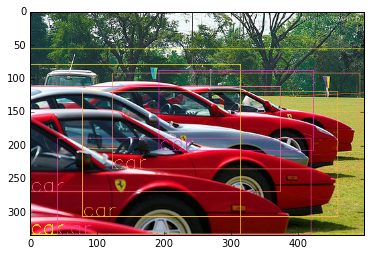

Box out of bounds: (77,71) (230,377)
Box out of bounds: (67,55) (163,393)
Box out of bounds: (164,-22) (297,254)
Box out of bounds: (17,232) (363,435)
Box out of bounds: (400,336) (522,386)
Box out of bounds: (186,157) (429,413)
Box out of bounds: (246,151) (368,467)
Box out of bounds: (70,-12) (545,307)
(0.0, 0.83504599332809448)


In [8]:
%matplotlib inline
import evaluate
import cv2
import numpy as np
from cntk import logging

data_input = logging.graph.find_by_name(trained_model, "data")
img_width = data_input.shape[2]
img_height= data_input.shape[1]


obj_min, obj_max=1, 0
data_path= r"../../DataSets/Pascal/VOCdevkit/VOC2007/JPEGImages"
img_list = [18,118,1118,27,2118,4118,1,2,3,4,5,6,7,8,9,10]
# img_list = open(r"..\..\DataSets\Pascal\VOCdevkit\VOC2007\ImageSets\Main\test.txt").read().split()
save_path = os.path.join(".", "outputdir", "results", "pvoc2007")
if not os.path.exists(save_path):
    results_dir = os.path.join(".", "outputdir", "results")
    if not os.path.exists(results_dir):
        output_dir = os.path.join(".", "outputdir")
        if not os.path.exists(output_dir):
            os.mkdir(output_dir)
        os.mkdir(results_dir)
    os.mkdir(save_path)

for i in range(len(img_list)):
    img_name =  "{:06}.jpg".format(img_list[i])
    img = evaluate.load_image(os.path.join(data_path, img_name))

    preds = evaluate.predictions_for_image(img, trained_model, img_width, img_height)
    preds_nms = evaluate.do_nms(preds)
    #import ipdb;ipdb.set_trace()
    color_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    evaluate.draw_bb_on_image(color_image, preds_nms)

    if i<5:
        evaluate.plot_image(color_image)

    out_img = cv2.cvtColor(color_image, cv2.COLOR_RGB2BGR)

    evaluate.save_image(out_img, save_path, "bb_"+img_name)

    #import math
    objectnesses = preds[:,4]
    obj_min = np.minimum(obj_min, np.minimum.reduce(objectnesses))
    obj_max = np.maximum(obj_max, np.maximum.reduce(objectnesses))
print((obj_min,obj_max))


In [1]:
run darknet/darknet19_dist.py

Training 55336 parameters in 4 parameter tensors.

Created Model!
PROGRESS: 0.00%
 Minibatch[   1- 100]: loss = 2.279864 * 12800, metric = 85.08% * 12800;
 Minibatch[ 101- 200]: loss = 2.279287 * 12800, metric = 85.05% * 12800;
PROGRESS: 0.00%
 Minibatch[ 201- 300]: loss = 2.285336 * 12800, metric = 84.11% * 12800;
 Minibatch[ 301- 400]: loss = 2.294133 * 12800, metric = 84.70% * 12800;
 Minibatch[ 401- 500]: loss = 2.300218 * 12800, metric = 87.98% * 12800;
PROGRESS: 0.00%
 Minibatch[ 501- 600]: loss = 2.301870 * 12800, metric = 87.53% * 12800;
 Minibatch[ 601- 700]: loss = 2.302677 * 12800, metric = 89.18% * 12800;
 Minibatch[ 701- 800]: loss = 2.302716 * 12800, metric = 89.98% * 12800;
PROGRESS: 0.00%
 Minibatch[ 801- 900]: loss = 2.302834 * 12800, metric = 90.01% * 12800;
 Minibatch[ 901-1000]: loss = 2.302886 * 12800, metric = 90.23% * 12800;
PROGRESS: 0.00%
 Minibatch[1001-1100]: loss = 2.302839 * 12800, metric = 89.91% * 12800;
 Minibatch[1101-1200]: loss = 2.302708 * 12800, met

KeyboardInterrupt: 

RuntimeError: SWIG director method error.

In [1]:
run darknet/darknet19.py

Created Model!
Created Readers!
Training 21479306 parameters in 74 parameter tensors.

Minibatch size is 256
Finished Epoch[1 of 45]: [Training] loss = 1.737618 * 50000, metric = 63.39% * 50000 46.387s (1077.9 samples/s);
Finished Epoch[2 of 45]: [Training] loss = 1.417183 * 50000, metric = 51.11% * 50000 47.636s (1049.6 samples/s);
Finished Epoch[3 of 45]: [Training] loss = 1.242651 * 50000, metric = 44.56% * 50000 48.019s (1041.2 samples/s);
Finished Epoch[4 of 45]: [Training] loss = 1.120497 * 50000, metric = 40.08% * 50000 47.781s (1046.4 samples/s);
Finished Epoch[5 of 45]: [Training] loss = 1.014138 * 50000, metric = 36.19% * 50000 47.624s (1049.9 samples/s);
Finished Epoch[6 of 45]: [Training] loss = 0.921855 * 50000, metric = 32.85% * 50000 47.580s (1050.9 samples/s);
Finished Epoch[7 of 45]: [Training] loss = 0.854383 * 50000, metric = 30.56% * 50000 47.824s (1045.5 samples/s);
Finished Epoch[8 of 45]: [Training] loss = 0.784517 * 50000, metric = 27.63% * 50000 47.366s (1055.6